## Introduction To this Analysis

#### See the notebooks "Part 3 Helper - Parse Activity Log.ipynb" for the activity log pre-processing and "Part 3 Helper - Prepare Article Metadata.ipynb" for the article metadata preprocessing. The below exploration uses pickles from those notebooks.

## Part 1: Exploration of Article Metadata

In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [114]:
data = pd.read_pickle('assets\dataset\ArticleMetadata.pkl')
data.head(2)

,Url,Title,Tags,Topic,DatePublished,Abstract,FullText
ArticleId,,,,,,,
12897,/articles/amc-s-halt-and-catch-fire-is-capital...,"AMC’s ""Halt and Catch Fire"" Is Capitalism's Fi...","Capitalism,Competition,Property Rights,Entrepr...",Economics,9/2/2015 10:56:24 AM,"""The show is a vibrant look at the early PC in...","""AMC's Halt and Catch Fire is a brilliant achi..."
58871,/articles/americas-aristocracy-of-privilege-an...,America's Aristocracy of Privilege and Power,"Government,Government Intervention",Policy,3/25/2015 12:00:00 AM,"""The problem with politics is power, not people.""","""Bush, Kennedy, Romney, Clinton, and, yes, eve..."


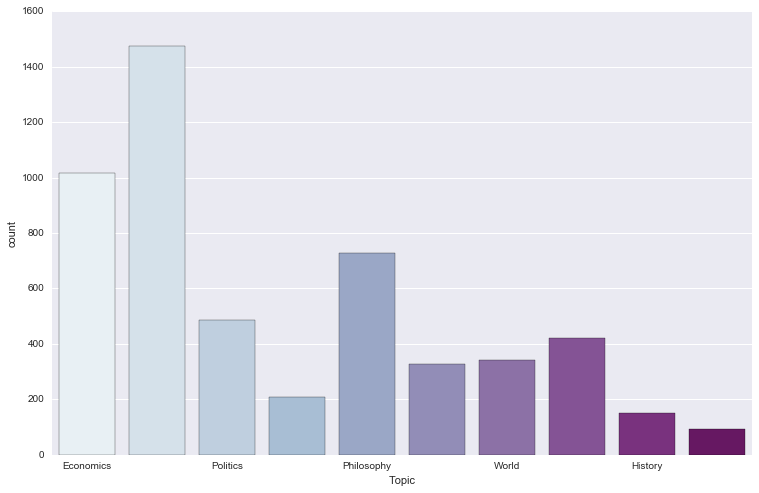

In [3]:
g = sns.factorplot(x="Topic", data=data, kind="count",palette="BuPu", size=7, aspect=1.5, legend=True)
g.set_xticklabels(step=2)

In [123]:
data.DatePublished = pd.to_datetime(data.DatePublished)
data.Tags = data.Tags.map(lambda x: str(x))

data['year'] = data.DatePublished.map(lambda x: x.year)
data.Tags = data.Tags.map(lambda x: str(x))
data.head(2)

,Url,Title,Tags,Topic,DatePublished,Abstract,FullText,year
ArticleId,,,,,,,,
12897,/articles/amc-s-halt-and-catch-fire-is-capital...,"AMC’s ""Halt and Catch Fire"" Is Capitalism's Fi...","Capitalism,Competition,Property Rights,Entrepr...",Economics,2015-09-02 10:56:24,"""The show is a vibrant look at the early PC in...","""AMC's Halt and Catch Fire is a brilliant achi...",2015
58871,/articles/americas-aristocracy-of-privilege-an...,America's Aristocracy of Privilege and Power,"Government,Government Intervention",Policy,2015-03-25 00:00:00,"""The problem with politics is power, not people.""","""Bush, Kennedy, Romney, Clinton, and, yes, eve...",2015


      year
year      
1900     7
1954     1
1955    37
1956   136
1957    34


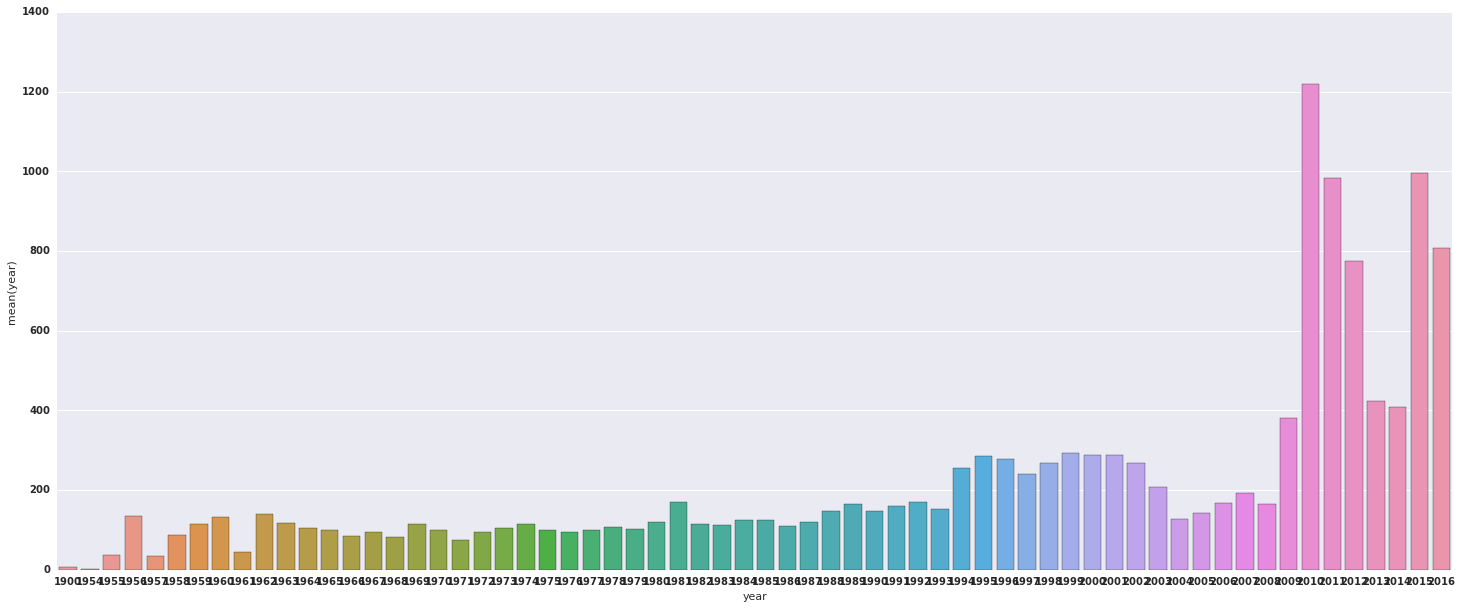

In [170]:
articles_by_year=data.groupby('year').year.count()
articles_by_year_df = pd.DataFrame(articles_by_year)
print(articles_by_year_df.head())
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 22})
# #g = sns.distplot(data.year,hist=True,axlabel="Date Published",)
plt.autoscale(True)
# g = sns.factorplot(xdata=articles_by_year_df, kind="count",palette="BuPu", size=7, aspect=1.5, legend=True)
# TOD: how do I show the total for each year?
g = sns.barplot(x=articles_by_year_df.index,y=articles_by_year_df.year)

In [6]:
import numpy as np
data.TagArray = data.Tags.map(lambda x: x.split(','))
data.TagArray[0]

['Capitalism',
 'Competition',
 'Property Rights',
 'Entrepreneurship',
 'Free Markets',
 'Market Process',
 'Biographies',
 'Innovation',
 'Arts and Music',
 'Technology']

In [7]:
values = []
for tags in data.TagArray:
    for tag in tags:
        values.append(tag)
    
print(len(values))

23580


In [71]:
tags = pd.DataFrame(values,columns=['Tag'])
tag_groups = tags.groupby('Tag').Tag.count()
tag_groups = tag_groups.sort_values(ascending=False)
tag_groups[1:10]

Tag
Regulation          425
Capitalism          392
Taxation            384
Socialism           331
Free Markets        301
Liberty             281
Property Rights     277
Morality            268
Entrepreneurship    262
Name: Tag, dtype: int64

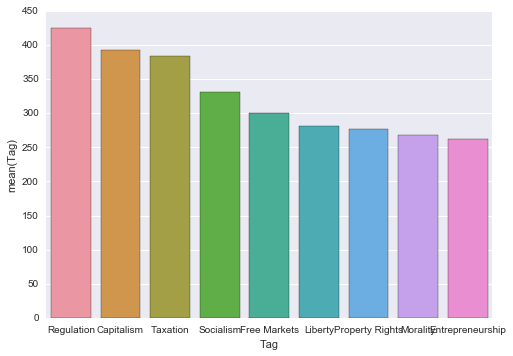

In [68]:
#  plt.figure(figsize=(50,10))
g = sns.barplot(x=tag_groups[1:10].index,y=tag_groups[1:10])

In [69]:
# Topic Frequencies
topic_groups = data.Topic.groupby(data.Topic).count()
topic_groups = topic_groups.sort_values(ascending=False)
# topic_groups.head(20)
topic_df = pd.DataFrame(topic_groups)
topic_df.head()

,Topic
Topic,
Policy,1473
Economics,1018
Philosophy,728
Politics,486
Justice,420


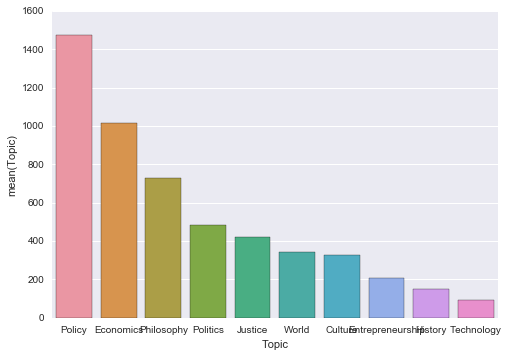

In [70]:
g = sns.barplot(x=topic_df.index,y=topic_df.Topic)

## Part 2: Exploration of Visitor Activity Metadata

In [93]:
activity = pd.read_pickle('ActivityLog.pkl')
activity.head(2)

,Time,Time_pretty,IPAddress,SessionID,ActionType,ActionTitle,URL,ReferrerURL,ReferrerDomain,ReferrerSearch,Custom,StatsURL
0,1467259199,"Wed Jun 29 2016, 11:59pm",67.10.55.25,200751638,pageview,World’s Poor: “We Want Capitalism” | Foundatio...,/articles/world-s-poor-we-want-capitalism//,http://facebook.com/,facebook.com,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
1,1467259199,"Wed Jun 29 2016, 11:59pm",24.56.36.58,200751637,pageview,Rise of the Libertarians | Foundation for Econ...,/articles/rise-of-the-libertarians/,http://facebook.com/,facebook.com,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...


In [107]:
activity.sort_values(by='Time', inplace=True)
activity.Time_pretty = pd.to_datetime(activity.Time_pretty)
activity.SessionID = pd.to_numeric(activity.SessionID)
activity.URL = activity.URL.map(lambda x: str(x))
activity.head()

,Time,Time_pretty,IPAddress,SessionID,ActionType,ActionTitle,URL,ReferrerURL,ReferrerDomain,ReferrerSearch,Custom,StatsURL
999,1467203627,2016-06-29 08:33:00,198.200.181.196,199855687,pageview,The Fall of Rome Began with the Abuse of Refug...,/articles/the-fall-of-rome-began-with-the-abus...,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
998,1467203628,2016-06-29 08:33:00,82.141.246.161,199855703,pageview,Some Constructive Heresies of Wilhelm Röpke | ...,/articles/some-constructive-heresies-of-wilhel...,http://google.ie/,google.ie,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
997,1467203628,2016-06-29 08:33:00,216.118.146.142,199855704,pageview,The Fall of Rome Began with the Abuse of Refug...,/articles/the-fall-of-rome-began-with-the-abus...,http://facebook.com/,facebook.com,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
994,1467203629,2016-06-29 08:33:00,5.172.247.247,199853715,download,The Essential Frederic Bastiat (epub),/media/15576/theessentialfredericbastiat.epub,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
996,1467203629,2016-06-29 08:33:00,209.142.132.108,199855718,pageview,Free Ebooks: These Five Freedom Philosophers W...,/articles/these-five-freedom-philosophers-will...,http://facebook.com/,facebook.com,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...


#### Pages Per Session Exploration

In [95]:
sessions = activity.groupby('SessionID').SessionID.count()

In [194]:
# how many unique sessions are there?
sessions.shape

(25484,)

In [97]:
# most active sessions
sessions.sort_values(ascending=False).head(20)

SessionID
199923200    208
200669377    124
199942889    107
200244862     76
199881930     76
200372159     66
200446203     61
200214958     59
199884933     51
200601020     51
200072200     50
199899460     50
200546230     47
200069617     47
199925315     43
199867525     40
200691508     38
199902532     37
199962564     37
199892674     35
Name: SessionID, dtype: int64

In [108]:
# get a sample session:
activity[activity.SessionID == 199923200]

,Time,Time_pretty,IPAddress,SessionID,ActionType,ActionTitle,URL,ReferrerURL,ReferrerDomain,ReferrerSearch,Custom,StatsURL
375,1467208101,2016-06-29 09:48:00,165.234.180.9,199923200,pageview,"Trump’s Economic Plan: Higher Taxes, Higher In...",/articles/trump-s-economic-plan-higher-taxes-h...,http://google.com/search?q=%5Bsecure+search%5D,google.com,[secure search],NaN,http://clicky.com/stats/visitors-actions?site_...
38,1467208349,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,The Weird Hobbesianism of the Brexiphobes | Fo...,/articles/the-weird-hobbesianism-of-brexiphobes/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
39,1467208349,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,The Fall of Rome Began with the Abuse of Refug...,/articles/the-fall-of-rome-began-with-the-abus...,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
34,1467208351,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,The Death and Rise of the Middle Class | Found...,/resources/bill-frezza-wins-the-2016-beth-hoff...,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
33,1467208352,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,Why the Gun Debate Never Ends | Foundation for...,/articles/why-the-gun-debate-never-ends/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
32,1467208353,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,Time to End the Block-Size Blockade | Foundati...,/articles/time-to-end-the-block-size-blockade/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
31,1467208353,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,When Child Labor Is Your Only Option | Foundat...,/articles/when-child-labor-is-your-only-option/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
27,1467208356,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,The Death and Rise of the Middle Class | Found...,/articles/give-me-liberty/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
25,1467208360,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,Don’t Believe the Brexit Prophecies of Economi...,/articles/don-t-believe-the-brexit-prophecies-...,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...
23,1467208361,2016-06-29 09:52:00,165.234.180.9,199923200,pageview,The Death and Rise of the Middle Class | Found...,/articles/the-never-ending-fiasco-of-fiat-money/,NaN,NaN,NaN,NaN,http://clicky.com/stats/visitors-actions?site_...


In [116]:
# can we get the tags for this session?
sample_urls = activity[activity.SessionID == 199923200]['URL']
sample_urls.head(5)

375    /articles/trump-s-economic-plan-higher-taxes-h...
38      /articles/the-weird-hobbesianism-of-brexiphobes/
39     /articles/the-fall-of-rome-began-with-the-abus...
34     /resources/bill-frezza-wins-the-2016-beth-hoff...
33              /articles/why-the-gun-debate-never-ends/
Name: URL, dtype: object

In [115]:
data[data.Url == sample_urls[0]].Tags

ArticleId
137837    Essential,Communism,Free Markets,Property Righ...
Name: Tags, dtype: object

### Session Summary Statistics

In [238]:
sessions_data = pd.DataFrame(sessions)
stats = sessions_data.describe()
stats

,SessionID
count,25484.000000
mean,1.962015
std,3.113513
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,208.000000


std: 3.113452
mean: 1.962015


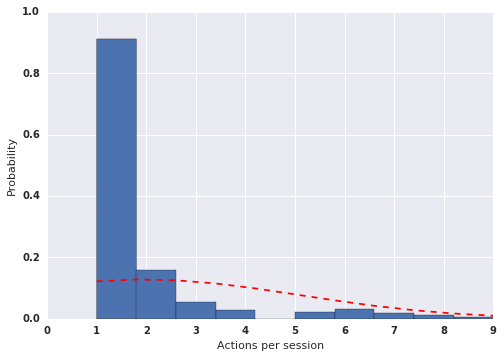

In [260]:
sigma = float(np.std(sessions_data))
print("std: %f" % sigma)
mu = float(np.mean(sessions_data))
print("mean: %f" % mu)
num_bins = 10
n, bins, patches = plt.hist(sessions_data[sessions_data.SessionID < num_bins].SessionID,num_bins, normed=1)
plt.xlabel("Actions per session")
plt.ylabel('Probability')
# # add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)

plt.plot(bins, y, 'r--')

In [273]:
# bounce rate:
bounce = len(sessions_data[sessions_data.SessionID == 1])/len(sessions_data)
# 72% of visitors only take 1 action

0.7160178935802857

#### Referrer Summary

In [174]:
activity.ReferrerURL.head()

999                     NaN
998       http://google.ie/
997    http://facebook.com/
994                     NaN
996    http://facebook.com/
Name: ReferrerURL, dtype: object

In [ ]:
# from urlparse import urlparse
# def GetHostNameFromURL(url):
#     parsed_uri = urlparse( url )
#     domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
#     return domain

# activity['ReferrerDomain'] = activity.ReferrerURL.map(lambda x: GetHostNameFromURL(x))

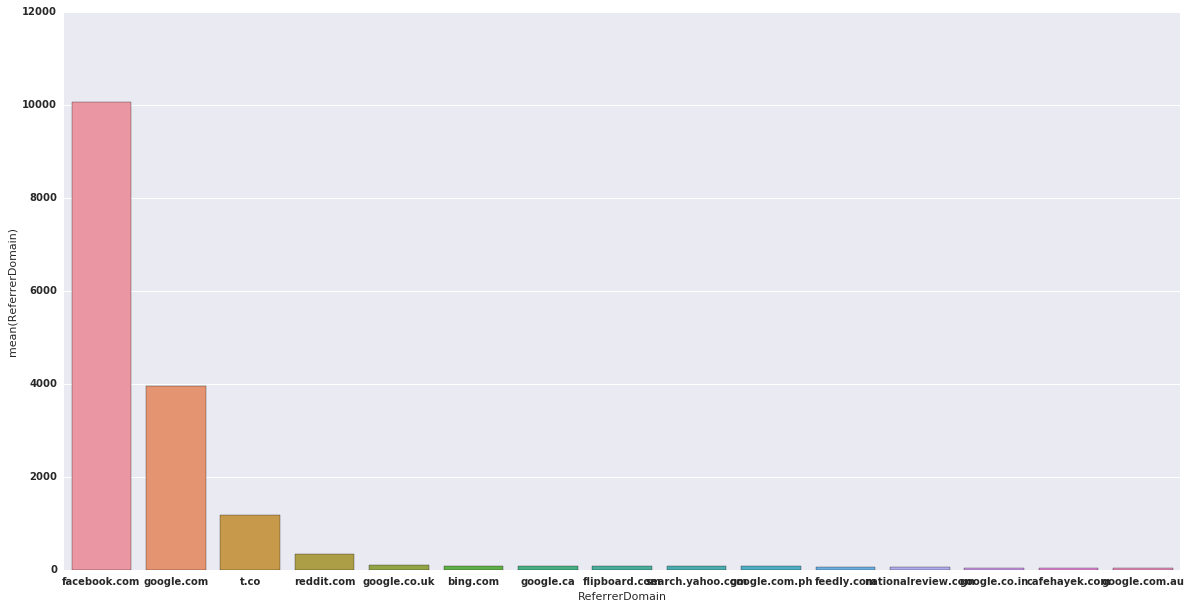

In [192]:
referer_domains= pd.DataFrame(activity.groupby('ReferrerDomain').ReferrerDomain.count()).sort_values(by="ReferrerDomain",ascending=False).head(20)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 42})
plt.autoscale(True)
g = sns.barplot(x=referer_domains.head(15).index,y=referer_domains.ReferrerDomain.head(15))